 

# Predicting Graduate Admission: 

## KNN vs. GBM Model Performance


#### Fall 2020

#### Genan H 



## Project Goals

### To examine and compare the performance of two models (KNN and GBM) in predicting admission to the graduate program 

### Models will be evaluated by measuring and comparing:

####    > Their ability to correctly classify the instances in general (accuracy)

####    > Their ability to distinguish positive classes from negative ones (auc)





## Problem Statement


#### The project will study a graduate admission dataset and build two Machine Learning models, that

#### predict whether an applicant will be admitted to the graduate program or not, based on information
   
#### from his application, including his GPA, GRE score and the ranking of his previous university





## Method & Procedure


### Two supervised learning algorithms (KNN & GBM) will be implemented to solve this 

### binary classification problem 


### The project will be conducted in the following steps:


#### >>    Data exploration and preparation

#### >>    Building and training the models

#### >>    Testing and evaluating the performance

#### >>    Comparing models’ performance





# Gradient Boosting Machine (GBM) Algorithm



### A tree-based ensemble method that involves growing multiple trees sequentially



### Each tree is trained on a modified version of the original training set based on 

### information from the evaluation of preceding trees



### The final prediction is a weighted sum of the predictions made by all the trees 














# K Nearest Neighbours (KNN) Algorithm



### Lazy algorithm that memorizes the training data rather than learning functions from it

### The value of 'K' (number of Nearest Neighbours) is the core factor that affects the performance


### Classifies a new data point, based on feature similarity (how similar the new point is to its neighbors)

### Similarity is determined by calculating the distance between the new instance and its neighbours using the Euclidean or Manhattan distance
 
 






# Gradient Boosting Machine (GBM) Implementation





### Data Exploration and Preparation  



In [26]:
# import and explore dataset

applc <- read.csv("un_applic_ binary.csv", header=TRUE)
str(applc)
head(applc)
summary(applc)

'data.frame':	400 obs. of  4 variables:
 $ admit: int  0 1 1 1 0 1 1 0 1 0 ...
 $ gre  : int  380 660 800 640 520 760 560 400 540 700 ...
 $ gpa  : num  3.61 3.67 4 3.19 2.93 3 2.98 3.08 3.39 3.92 ...
 $ rank : int  3 3 1 4 4 2 1 2 3 2 ...


,admit,gre,gpa,rank
,<int>,<int>,<dbl>,<int>
1,0,380,3.61,3
2,1,660,3.67,3
3,1,800,4.00,1
4,1,640,3.19,4
5,0,520,2.93,4
6,1,760,3.00,2


     admit             gre             gpa             rank      
 Min.   :0.0000   Min.   :220.0   Min.   :2.260   Min.   :1.000  
 1st Qu.:0.0000   1st Qu.:520.0   1st Qu.:3.130   1st Qu.:2.000  
 Median :0.0000   Median :580.0   Median :3.395   Median :2.000  
 Mean   :0.3175   Mean   :587.7   Mean   :3.390   Mean   :2.485  
 3rd Qu.:1.0000   3rd Qu.:660.0   3rd Qu.:3.670   3rd Qu.:3.000  
 Max.   :1.0000   Max.   :800.0   Max.   :4.000   Max.   :4.000  


For binary classification, gbm() requires the response to be encoded as 0/1 (numeric), 
so we will keep the 0/1 numeric response column and will not convert it to a factor



In [2]:
# check for class balance in the target "admit" for the whole data 

table(applc$admit)


  0   1 
273 127 

In [27]:
# Normalise independent variables 

normalize <- function(x) {
return ((x - min(x)) / (max(x) - min(x))) }

applc$gre <- normalize(applc$gre)
applc$gpa <- normalize(applc$gpa)
applc$rank <- normalize(applc$rank)

# look at normalised variables

head(applc)

,admit,gre,gpa,rank
,<int>,<dbl>,<dbl>,<dbl>
1,0,0.2758621,0.7758621,0.6666667
2,1,0.7586207,0.8103448,0.6666667
3,1,1.0000000,1.0000000,0.0000000
4,1,0.7241379,0.5344828,1.0000000
5,0,0.5172414,0.3850575,1.0000000
6,1,0.9310345,0.4252874,0.3333333


In [28]:
## split data into train and test (80%, 20%)
# Total number of rows in the data

n <- nrow(applc)

In [29]:
# Number of rows for the training set (80% of the dataset)
n_train <- round(0.80 * n) 

# Create a vector of indices (80% random sample)

set.seed(123)
train_indices <- sample(1:n, n_train)

# Subset the data to training indices only, to create train set
applc_train <- applc[train_indices, ]  
  
# Exclude the training indices, to create the test set (20% of the dataset)
applc_test <- applc[-train_indices, ]

str(applc_train)
str(applc_test)

'data.frame':	320 obs. of  4 variables:
 $ admit: int  0 0 1 0 0 0 0 0 0 1 ...
 $ gre  : num  0.69 0.828 0.655 0.621 0.828 ...
 $ gpa  : num  0.615 0.471 0.695 0.69 0.839 ...
 $ rank : num  0.667 0.333 0.333 1 0.333 ...
'data.frame':	80 obs. of  4 variables:
 $ admit: int  0 1 1 1 0 0 1 0 0 1 ...
 $ gre  : num  0.276 1 0.931 0.828 0.966 ...
 $ gpa  : num  0.776 1 0.425 1 0.925 ...
 $ rank : num  0.667 0 0.333 0 1 ...



  0   1 
216 104 

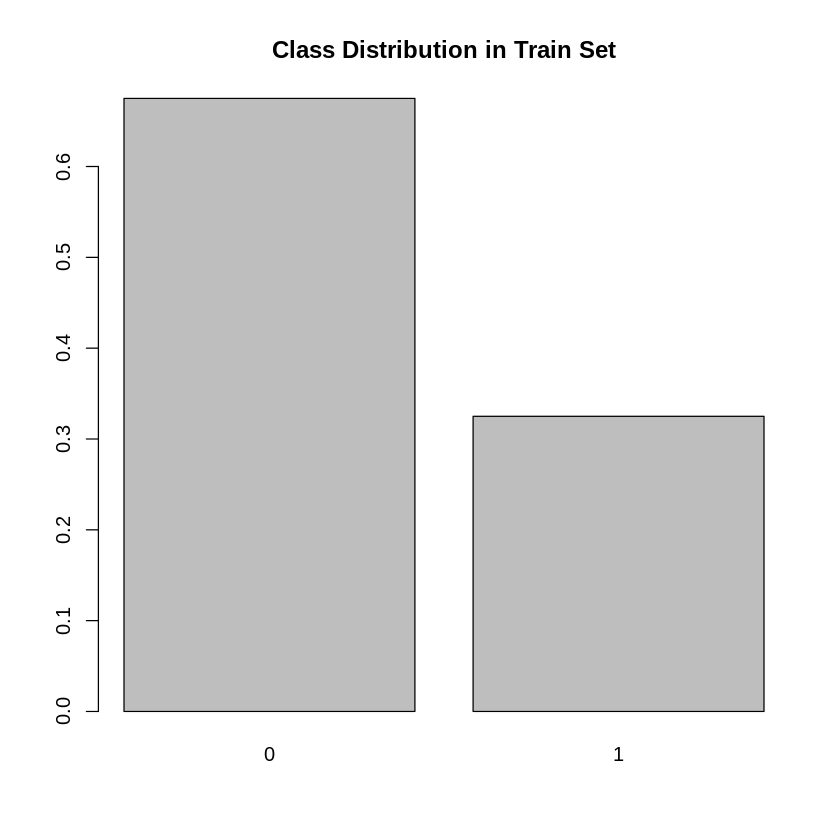

In [6]:
# check for class balance in the target "admit" of train set
# plot a barplot to show class imbalance 

table(applc_train$admit)
barplot(prop.table(table(applc_train$admit)), main = "Class Distribution in Train Set")

Installing package into ‘/home/jupyter/R/x86_64-pc-linux-gnu-library/3.6’
(as ‘lib’ is unspecified)




  0   1 
167 153 

     admit             gre              gpa              rank       
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.0000   1st Qu.:0.5172   1st Qu.:0.5115   1st Qu.:0.3333  
 Median :0.0000   Median :0.6552   Median :0.6724   Median :0.3333  
 Mean   :0.4781   Mean   :0.6503   Mean   :0.6582   Mean   :0.4813  
 3rd Qu.:1.0000   3rd Qu.:0.7931   3rd Qu.:0.8132   3rd Qu.:0.6667  
 Max.   :1.0000   Max.   :1.0000   Max.   :1.0000   Max.   :1.0000  

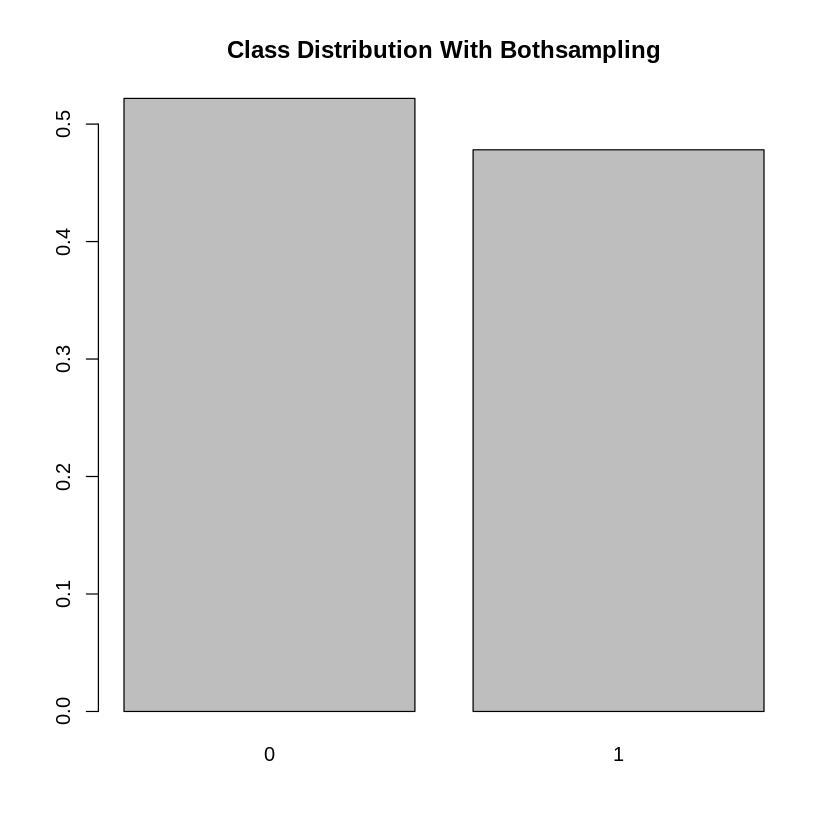

In [30]:
# use bothsampling method to create balanced classes in target (using train data)

#install.packages("ROSE")
library(ROSE)

boths <- ovun.sample(admit~., data = applc_train, method="both",
                     p = 0.5,
                     seed = 123,
                     N = 320)$data

# look at the balanced classes in target "admit" (train data)

table(boths$admit)
summary(boths)
barplot(prop.table(table(boths$admit)), main= "Class Distribution With Bothsampling")

## Building and Training the GBM Model


In [31]:
#install.packages("gbm")
library(gbm)

Installing package into ‘/home/jupyter/R/x86_64-pc-linux-gnu-library/3.6’
(as ‘lib’ is unspecified)



CV: 1 
CV: 2 
CV: 3 
CV: 4 
CV: 5 
CV: 6 
CV: 7 
CV: 8 
CV: 9 
CV: 10 
gbm(formula = admit ~ ., distribution = "bernoulli", data = boths, 
    n.trees = 10000, cv.folds = 10, n.cores = 1)
A gradient boosted model with bernoulli loss function.
10000 iterations were performed.
The best cross-validation iteration was 1431.
There were 3 predictors of which 3 had non-zero influence.


,var,rel.inf
,<fct>,<dbl>
gpa,gpa,55.30501
gre,gre,34.02099
rank,rank,10.67399


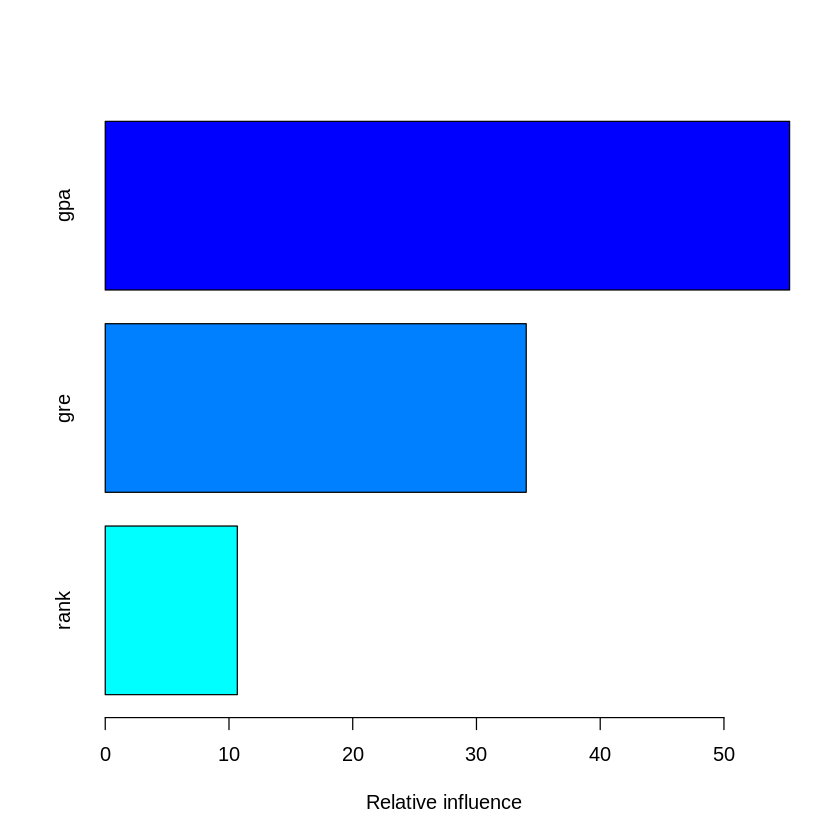

In [32]:

# Train a 10000-tree GBM model
set.seed(1)
gbm_model <- gbm(formula = admit ~ ., 
                    distribution = "bernoulli", 
                    data = boths,
                    n.trees = 10000,
                    cv.folds = 10,
                    n.cores = 1)
                    
# Print the GBM model object                    
print(gbm_model)

# summary() prints variable importance
summary(gbm_model)

[1] "Optimal n.trees (CV Estimate): 1431"


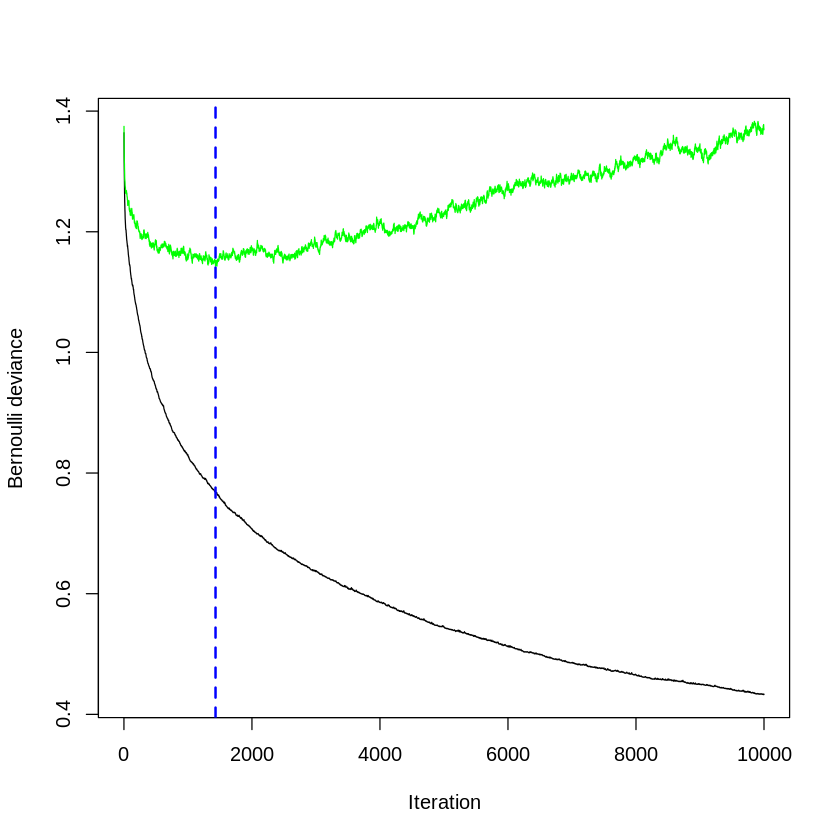

In [33]:
# Estimate the optimal # of trees based on CV

ntree_opt <- gbm.perf(object = gbm_model, 
                         method = "cv")
 
                      
print(paste0("Optimal n.trees (CV Estimate): ", ntree_opt))


## Testing and Evaluating the GBM Performance


In [34]:
# Generate predictions (probabilities) on the test set using ntree_opt number of trees

gbm_pred_prob <- predict(object = gbm_model, 
                  newdata = applc_test,
                  n.trees = ntree_opt, type = "response")

print(gbm_pred_prob)


 [1] 0.069523493 0.860747331 0.983433870 0.713365321 0.865012501 0.104298782
 [7] 0.658520870 0.705404576 0.017176183 0.592271692 0.291359062 0.627429407
[13] 0.061221229 0.465732835 0.068756114 0.045912837 0.221369494 0.597737400
[19] 0.766917819 0.634616925 0.427870071 0.135081334 0.888595442 0.649463826
[25] 0.035408577 0.039618279 0.981324662 0.708191137 0.146855812 0.109221605
[31] 0.384223425 0.445401064 0.471844672 0.061874453 0.411318017 0.751207022
[37] 0.167868326 0.661157551 0.004517258 0.489756036 0.226441019 0.473209659
[43] 0.364764624 0.217699183 0.773840868 0.363917100 0.563365560 0.019779154
[49] 0.038151653 0.356782734 0.915058576 0.544214940 0.854498429 0.593965742
[55] 0.147639983 0.710443973 0.240682275 0.368210060 0.843168705 0.581767341
[61] 0.626895843 0.677593537 0.062506712 0.160917151 0.155240509 0.747812455
[67] 0.029514860 0.310009745 0.253455947 0.046969609 0.262703324 0.317289575
[73] 0.667134016 0.295763966 0.503150256 0.354066650 0.353422839 0.269336995

In [35]:
#install.packages("ROCR")
library(ROCR)

Installing package into ‘/home/jupyter/R/x86_64-pc-linux-gnu-library/3.6’
(as ‘lib’ is unspecified)



In [36]:
library(pROC)
library(Metrics)

In [15]:
# Generate the AUC of gbm, using the preditions(`actual` must be a binary (or 1/0 numeric) vector)

auc_gbm <- auc(actual = applc_test$admit, predicted = gbm_pred_prob)  

# print GBM AUC 
                         
print(paste0("GBM Test set AUC", auc_gbm))

[1] "GBM Test set AUC0.710144927536232"


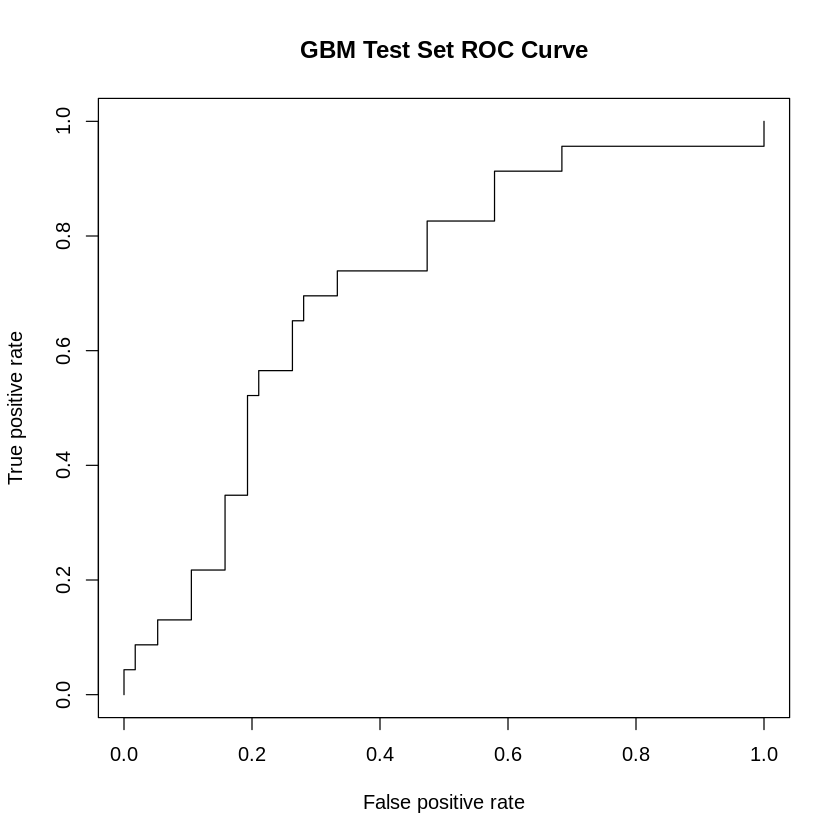

In [70]:
# Plot the GBM ROC curve using the predictions (probabilities)

pred <- prediction(gbm_pred_prob, applc_test$admit)
roc <- performance(pred, "tpr", "fpr")

plot(roc, col = as.list(1), main = "GBM Test Set ROC Curve")

In [17]:
# Convert probabilities into binary classes (0, 1) with threshold level = 0.5

prob <- gbm_pred_prob
gbm_pred <- ifelse(prob > 0.5, 1, 0)

gbm_pred
class(gbm_pred)
class(as.numeric(applc_test$admit))

[1] 0 1 1 1 1 0 1 1 0 1 0 1 0 0 0 0 0 1 1 1 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0 1
[39] 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0
[77] 0 0 1 1

[1] "numeric"

[1] "numeric"

In [19]:
#install.packages('caret', dependencies = TRUE)
library(caret)

Installing package into ‘/home/jupyter/R/x86_64-pc-linux-gnu-library/3.6’
(as ‘lib’ is unspecified)

Loading required package: lattice

Loading required package: ggplot2


Attaching package: ‘caret’


The following objects are masked from ‘package:Metrics’:

    precision, recall




In [20]:
library(lattice)
library(ggplot2)

In [21]:
# Measure GBM performance using the confusion matrix and the test set (convert to factor)

cm <- confusionMatrix(data = as.factor(gbm_pred),       
                reference = as.factor(applc_test$admit))

print(cm)

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 40  7
         1 17 16
                                          
               Accuracy : 0.7             
                 95% CI : (0.5872, 0.7974)
    No Information Rate : 0.7125          
    P-Value [Acc > NIR] : 0.65001         
                                          
                  Kappa : 0.3518          
                                          
 Mcnemar's Test P-Value : 0.06619         
                                          
            Sensitivity : 0.7018          
            Specificity : 0.6957          
         Pos Pred Value : 0.8511          
         Neg Pred Value : 0.4848          
             Prevalence : 0.7125          
         Detection Rate : 0.5000          
   Detection Prevalence : 0.5875          
      Balanced Accuracy : 0.6987          
                                          
       'Positive' Class : 0               
                                    


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




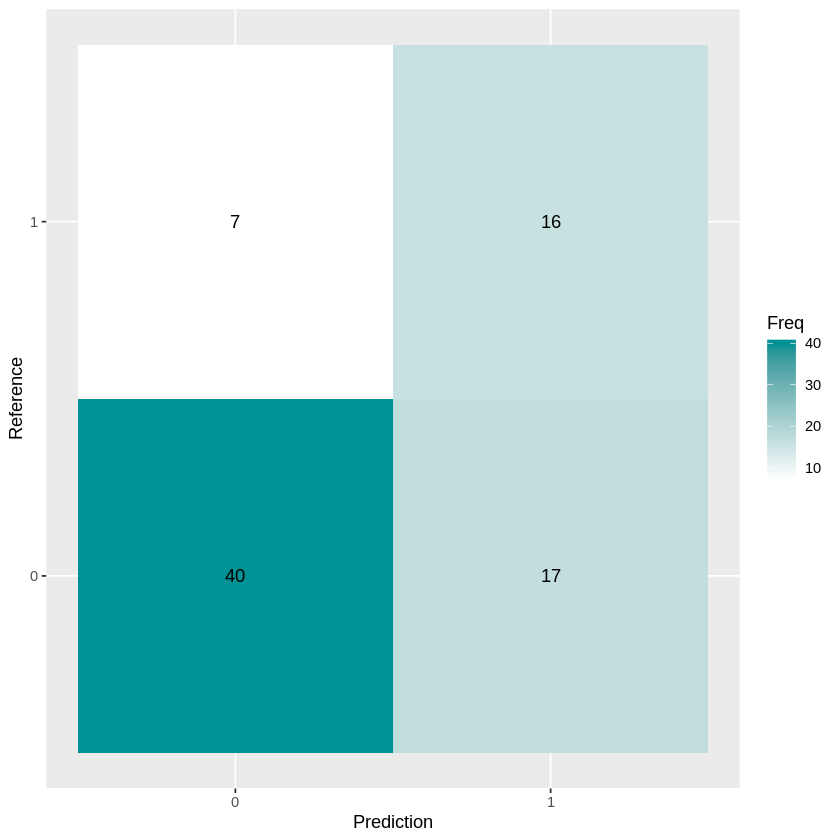

In [35]:
# Plot the confusion Matrix for GBM performance

library(dplyr)

ggplot(as.data.frame(cm$table), aes(Prediction,sort(Reference,decreasing = F), fill= Freq)) +
        geom_tile() + geom_text(aes(label=Freq)) +
        scale_fill_gradient(low="white", high="#009194") +
        labs(x = "Prediction",y = "Reference")